LOADING THE DATA

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:\MSC DS\data sets\Crop_recommendation_weather.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
#summary statistics of the data
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

EXPLORATORY DATA ANALYSIS

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

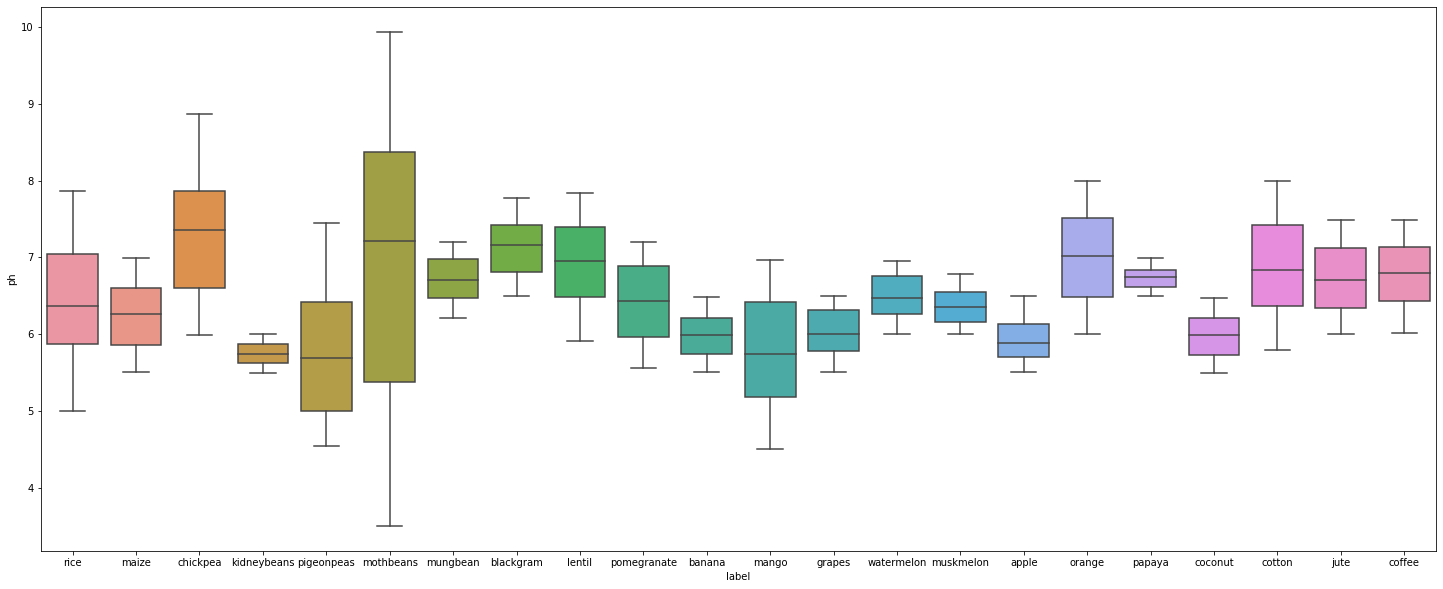

In [8]:
#sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(x='label',y='ph',data = data)

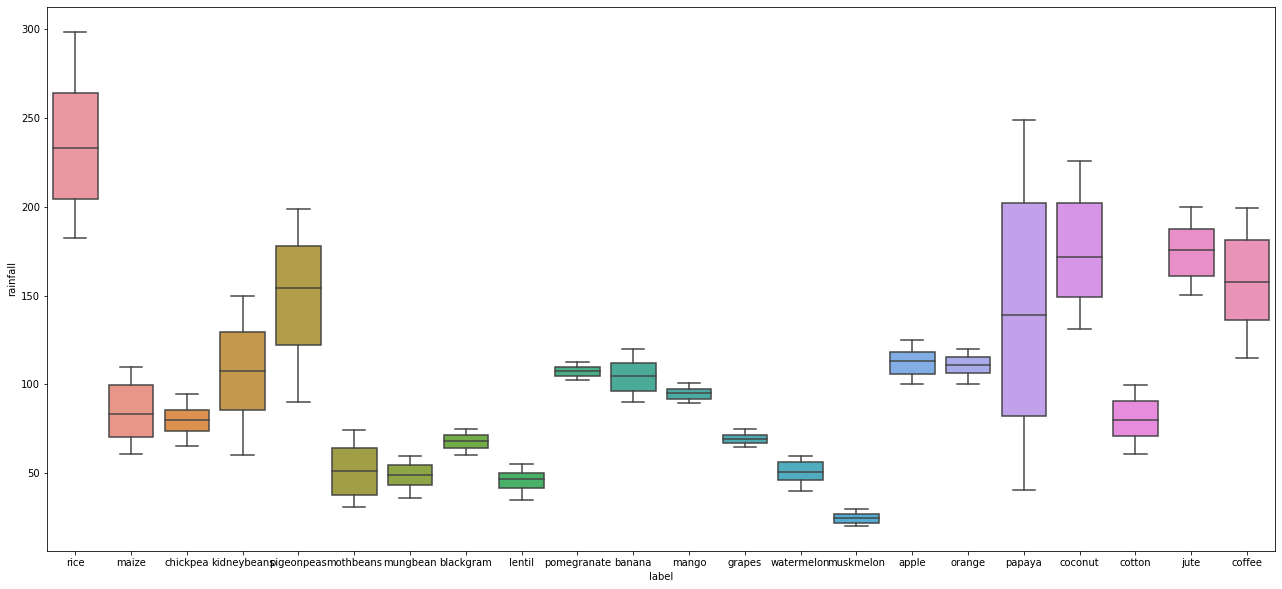

In [26]:
#sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x='label',y='rainfall',data = data)

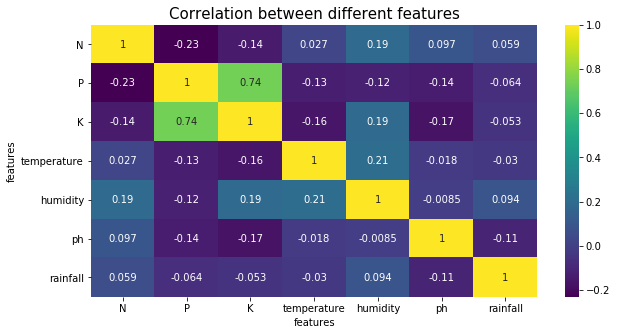

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

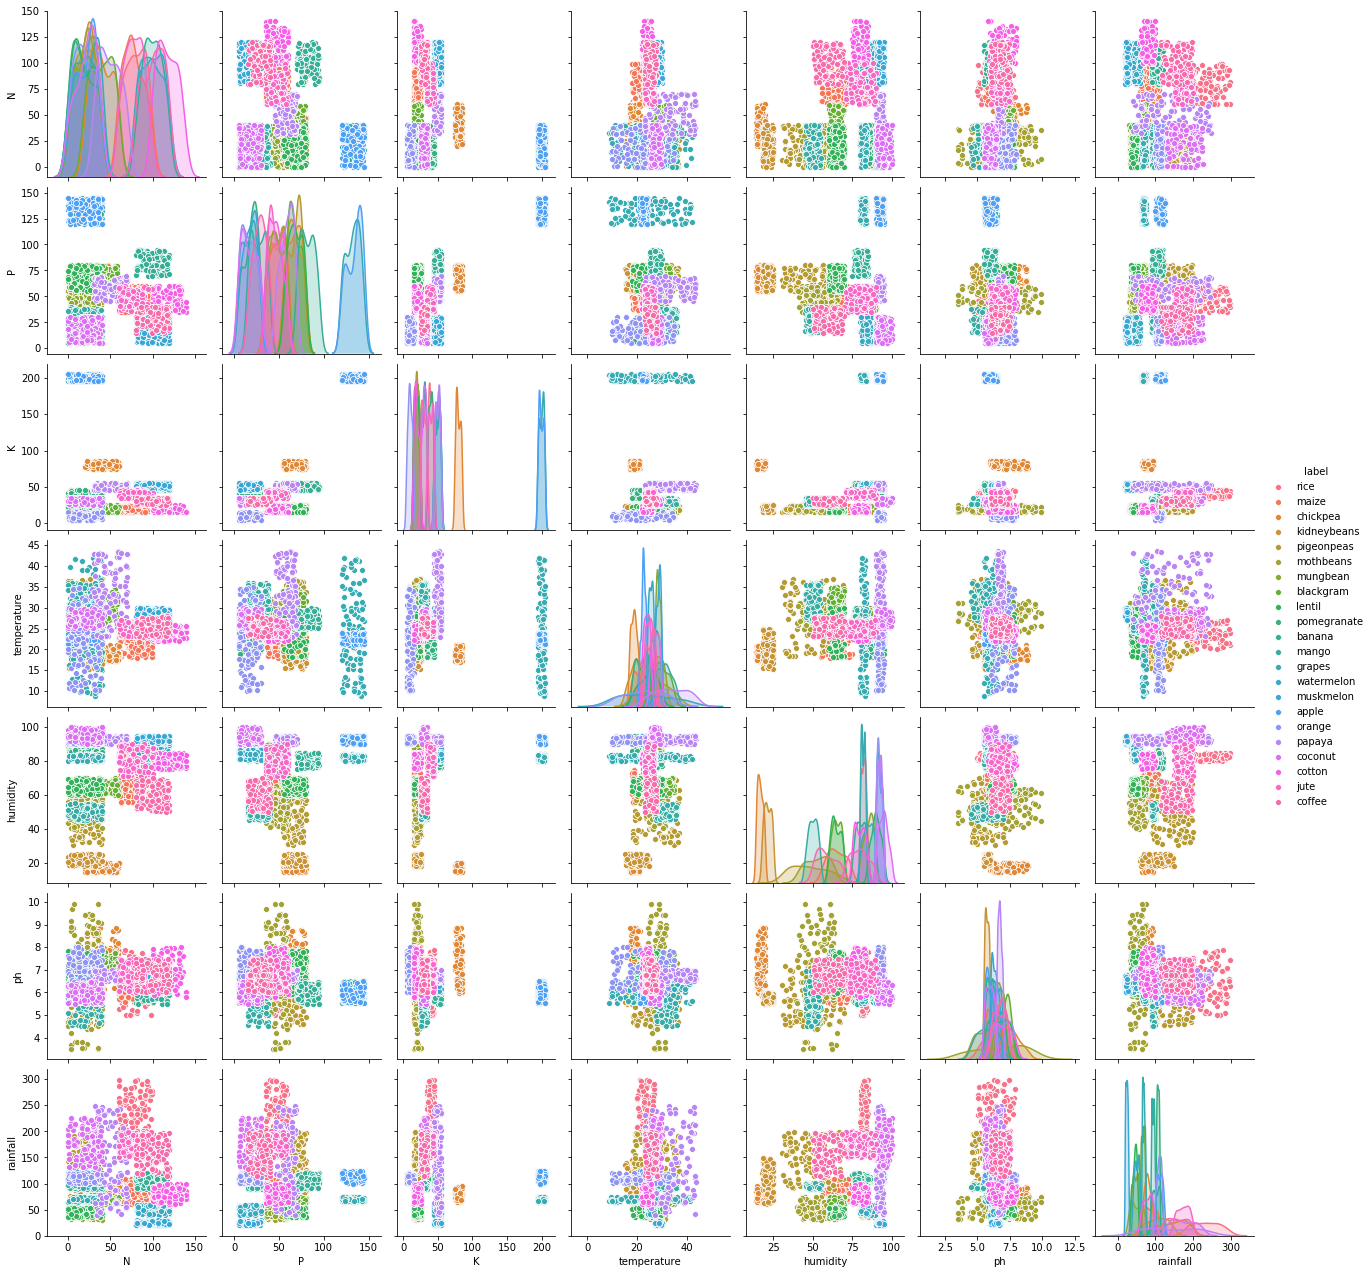

In [11]:
sns.pairplot(data,hue = 'label')

FITTING CLASSIFICATION MODELS

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Allocating dependent and independent variable
y = data.label
X = data.drop(columns='label')

In [14]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [1]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_pred= gnb.predict(X_test)

# accuracy on X_test
accuracy_gnb = metrics.accuracy_score(y_test,gnb_pred)
print("Naive Beyes model accuracy : ",accuracy_gnb)

# K fold cross validation score
score = cross_val_score(gnb , X , y , cv=5)
print('Cross validation score: ',score)

# model score
gnb_score = gnb.score(X_test, y_test)
print("Naive Beyes model score : ",gnb_score)

# creating a confusion matrix
cm_gnb = confusion_matrix(y_test, gnb_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm_gnb, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

NameError: name 'X_train' is not defined

SVM model score  0.9872727272727273
Support vector machine model accuracy :  0.9872727272727273
Cross validation score:  [0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]


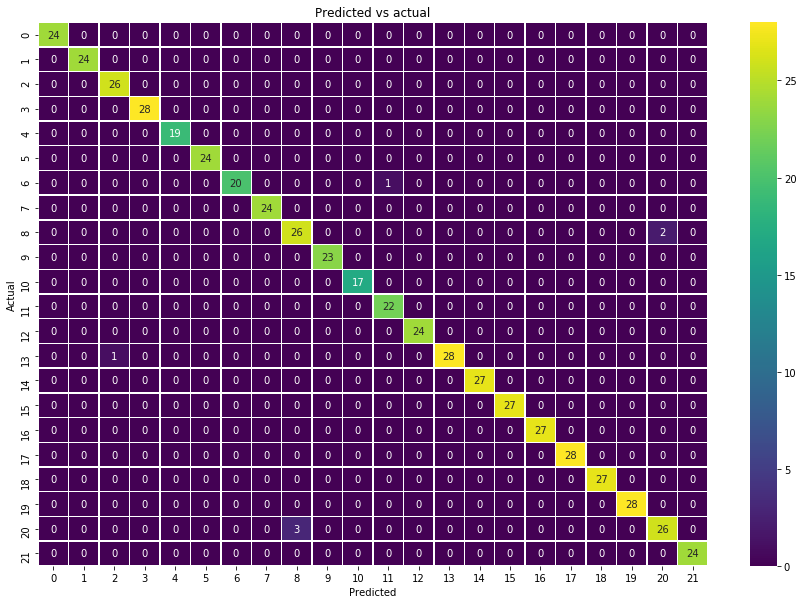

In [16]:
#linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_pred = svm_model_linear.predict(X_test)
 
# model score  
score = svm_model_linear.score(X_test, y_test)
print("SVM model score ",score)

# accuracy on X_test
accuracy_svm = metrics.accuracy_score(y_test,svm_pred)
print("Support vector machine model accuracy : ",accuracy_svm)

# K fold cross validation score
score = cross_val_score(svm_model_linear , X , y , cv=5)
print('Cross validation score: ',score)

# creating a confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

D Tree model score  0.9509090909090909
Decesion Tree model accuracy :  0.9509090909090909
Cross validation score:  [0.90681818 0.9        0.84545455 0.88863636 0.87727273]


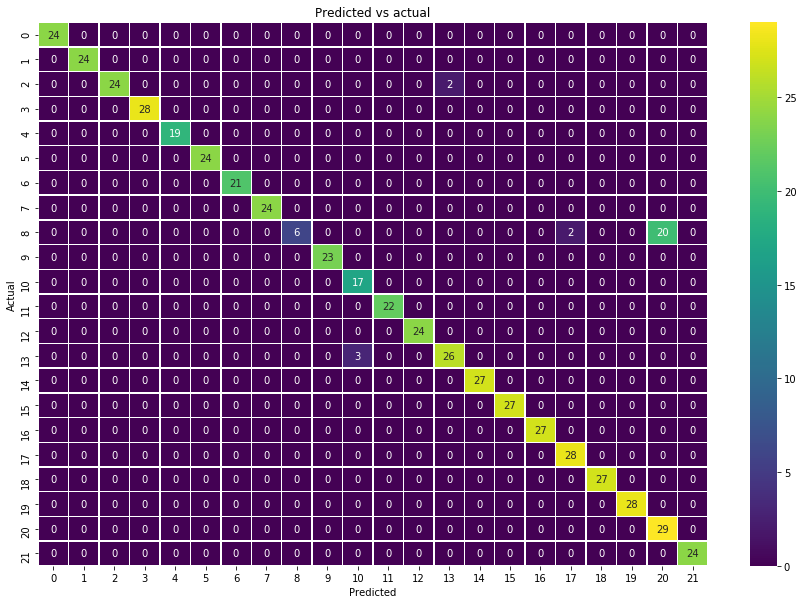

In [17]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
dtree_pred = dtree_model.predict(X_test)

# model score  
score = dtree_model.score(X_test, y_test)
print("D Tree model score ",score)

# accuracy on X_test
accuracy_dtree = metrics.accuracy_score(y_test,dtree_pred)
print("Decesion Tree model accuracy : ",accuracy_dtree)

# K fold cross validation score
score = cross_val_score(dtree_model , X , y , cv=5)
print('Cross validation score: ',score)

# creating a confusion matrix
cm_dtree = confusion_matrix(y_test, dtree_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dtree, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

Random Forest Classifier model score  0.9981818181818182
Decesion Tree model accuracy :  0.9981818181818182
Cross validation score:  [0.99772727 0.99090909 0.99772727 0.99545455 0.98636364]


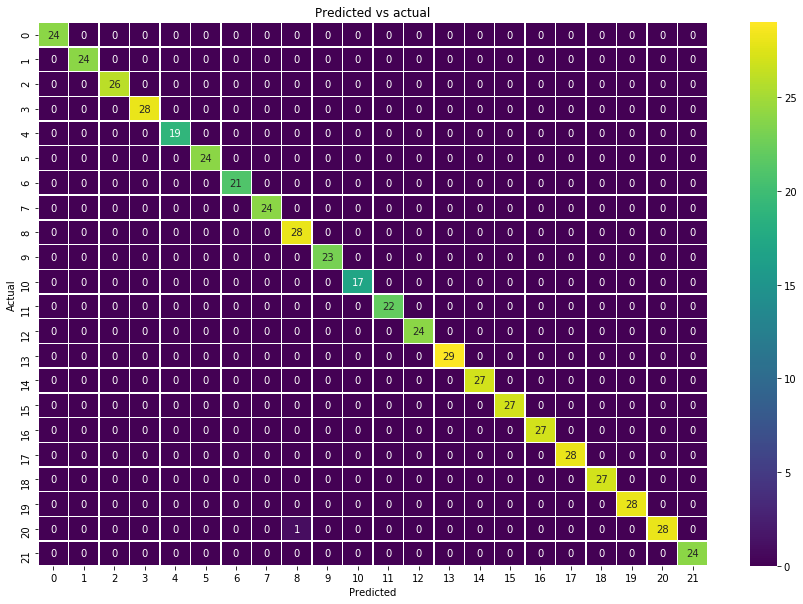

In [27]:
#linear Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFC_clf = RandomForestClassifier().fit(X_train, y_train)
RFC_clf_pred = RFC_clf.predict(X_test)
#print(RFC_clf_pred)
 
# model score  
score = RFC_clf.score(X_test, y_test)
print("Random Forest Classifier model score ",score)

# accuracy on X_test
accuracy_RFC = metrics.accuracy_score(y_test,RFC_clf_pred)
print("Decesion Tree model accuracy : ",accuracy_RFC)

# K fold cross validation score
score = cross_val_score(RFC_clf , X , y , cv=5)
print('Cross validation score: ',score)

# creating a confusion matrix
cm_RFC = confusion_matrix(y_test, RFC_clf_pred)
#print(cm_gnb)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_RFC, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

PERFORMANCE METRICS

In [ ]:
# Naive Bayes 
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [ ]:
# Support vector machine
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      0.95      0.98        21
      grapes       1.00      1.00      1.00        24
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       0.96      1.00      0.98        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [ ]:
# decesion tree classifier
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      0.92      0.96        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.85      1.00      0.92        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       0.93      0.90      0.91        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       0.93    

In [ ]:
# Random Forest Classifier
print(classification_report(y_test, RFC_clf_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        24
        jute       0.97      1.00      0.98        28
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

trial user input

In [ ]:
X_test.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [ ]:
user_input = [[40,30,15,39.00,75.00,7.8,40.00]]
df = pd.DataFrame(user_input, columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
RFC_clf.predict(df)

array(['mungbean'], dtype=object)

SAVING THE RANDOM FOREST MODEL FOR FUTURE USE 

In [ ]:
import joblib
joblib.dump(RFC_clf,'crop_classifier.pkl')


['crop_classifier.pkl']